In [ ]:
import tensorflow as tf

# Load the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [ ]:
#
numOfInstances, numOfFeatures = X_train.shape

In [ ]:
#Normalizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# we use transform here to avoid data leackage
X_test = scaler.transform(X_test)

In [ ]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[numOfFeatures], activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [ ]:
# Evaluate the model, prints loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9673
Train score: [0.09954489022493362, 0.9673366546630859]
6/6 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9591
Test score: [0.09815142303705215, 0.9590643048286438]


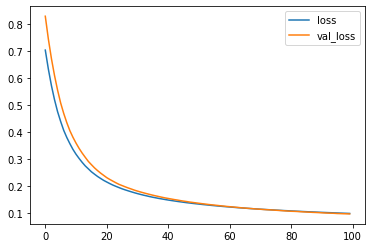

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

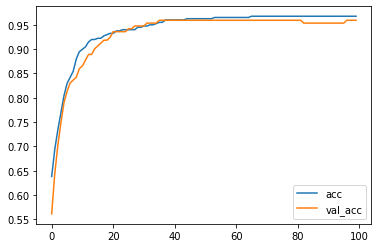

In [ ]:
# Plot the accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
y_pred = np.round(y_pred).flatten()
print(y_pred)

In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

In [ ]:
model.save('ClassificationMN.h5')

In [ ]:
!ls

ClassificationMN.h5  sample_data


In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('ClassificationNN.h5')
print(model.layers)
model.evaluate(X_test, y_test)

OSError: ignored